# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


632

In [4]:
lngs

array([138.08917502,  67.70670392, 100.95738019, ..., 167.34285586,
       103.67985248,  13.24836958])

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={gkey}&units={units}&q="

In [10]:
# set up lists to hold reponse info
lat = []
temp = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])
    print(f"Received response for city: {response['name']} with id {response['id']}")
    break;
    

#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")
print (response)

Received response for city: Moose Factory with id 6078372
{'coord': {'lon': -80.61, 'lat': 51.26}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 2, 'pressure': 1020, 'humidity': 93, 'temp_min': 2, 'temp_max': 2}, 'visibility': 14484, 'wind': {'speed': 2.1, 'deg': 100}, 'clouds': {'all': 90}, 'dt': 1538858640, 'sys': {'type': 1, 'id': 3683, 'message': 0.004, 'country': 'CA', 'sunrise': 1538825560, 'sunset': 1538866016}, 'id': 6078372, 'name': 'Moose Factory', 'cod': 200}


In [11]:
# set up lists to hold reponse info
lat = []
temp = []
humidity = []
clouds = []
wind = []
foundCities = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response ['main']['humidity'])
        clouds.append(response['clouds'] ['all'])
        wind.append(response['wind'] ['speed'])
        foundCities.append(city)
        
        print(f"Received response for city: {response['name']} with id {response['id']}")
#         print(f"The latitude information received is: {lat}")
#         print(f"The temperature information received is: {temp}")
#         print(f"The cloudliness information received is: {clouds}")
#         print(f"The humidity information received is: {humidity}")
#         print(f"The wind speed information received is: {wind}")

    except (KeyError, IndexError):
        print("Missing city data")
       

Received response for city: Moose Factory with id 6078372
Received response for city: Lagoa with id 2267254
Received response for city: Bluff with id 2175403
Missing city data
Received response for city: Portland with id 5746545
Received response for city: Tasiilaq with id 3424607
Received response for city: Georgetown with id 3378644
Received response for city: Tuktoyaktuk with id 6170031
Missing city data
Received response for city: Fort Nelson with id 5955902
Received response for city: Mahebourg with id 934322
Received response for city: Souillac with id 3026644
Received response for city: Sarankhola with id 1185239
Received response for city: San Quintin with id 1688687
Received response for city: Cockburn Town with id 3576994
Received response for city: Mareeba with id 2158767
Received response for city: Harrison with id 4513805
Received response for city: Saint-Joseph with id 3037456
Received response for city: Lebu with id 344979
Received response for city: Mataura with id 6201

Received response for city: Uyskoye with id 1544583
Received response for city: Calhoun with id 4185657
Received response for city: Haines Junction with id 5969025
Missing city data
Received response for city: Kloulklubed with id 7671223
Received response for city: Carauari with id 3664659
Received response for city: Vanimo with id 2084442
Received response for city: Whitianga with id 2179103
Received response for city: Chokurdakh with id 2126123
Received response for city: Ribeira Grande with id 3372707
Received response for city: Rawson with id 3839307
Received response for city: Faya with id 110690
Received response for city: Alipur with id 1184655
Received response for city: Matagami with id 2335713
Received response for city: Talnakh with id 1490256
Received response for city: Aneho with id 2367990
Received response for city: Waddan with id 2209055
Received response for city: Narsaq with id 3421719
Received response for city: Lavrentiya with id 4031637
Received response for city: 

Received response for city: Egvekinot with id 4031742
Received response for city: Takoradi with id 2294915
Received response for city: Arraial do Cabo with id 3471451
Received response for city: Rock Sound with id 3571592
Received response for city: Bhadrachalam with id 1276328
Received response for city: Darnah with id 87205
Received response for city: Dandong with id 2037886
Missing city data
Received response for city: Brigantine with id 4500920
Received response for city: Jablah with id 169304
Received response for city: Abu Dhabi with id 292968
Received response for city: Hendek with id 745664
Received response for city: Praia with id 3460954
Received response for city: Mbandaka with id 2312895
Received response for city: Samoded with id 499025
Missing city data
Received response for city: Chernyshkovskiy with id 568527
Received response for city: Uni with id 478996
Received response for city: Poum with id 787487
Received response for city: Ballina with id 2966778
Received respons

Received response for city: La Peca with id 3695675
Received response for city: Puerto Carreno with id 3671519
Received response for city: Kaeo with id 2189343
Received response for city: Clonakilty with id 2965402
Received response for city: Cravinhos with id 3465209
Received response for city: Yurginskoye with id 1485712
Received response for city: Kolyvan with id 1502822
Received response for city: Umea with id 602150
Received response for city: Edd with id 338345
Received response for city: Athabasca with id 5887916
Received response for city: Timmins with id 6166739
Received response for city: Santiago del Estero with id 3835869
Missing city data
Received response for city: Mattru with id 2409215
Received response for city: Alihe with id 2038665
Received response for city: Rio Cuarto with id 3838874
Missing city data
Missing city data
Received response for city: Hoquiam with id 5797693
Received response for city: Mhango with id 161218
Received response for city: Mishelevka with id

In [81]:
len (foundCities)

530

In [20]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": foundCities,
    "Lat": lat,
    "Temp": temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Winds": wind
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Temp,Humidity,Cloudiness,Winds
0,moose factory,51.26,2.00,93,90,2.10
1,lagoa,37.14,22.00,88,0,3.60
2,bluff,-23.58,18.51,88,0,3.25
3,portland,45.52,14.66,77,90,1.50
4,tasiilaq,65.61,2.00,64,88,14.90


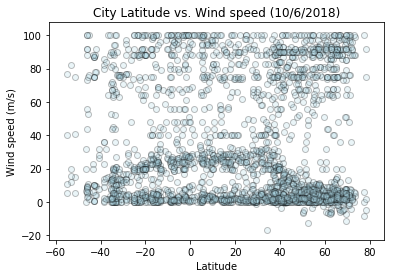

In [25]:
# Tell matplotlib to create a scatter plot based upon the above dataframe and x-axis city id
for field,name,units in [("Temp","Temperature","C"),("Humidity","Humidity","%"), ("Cloudiness","Cloudiness","%"), ("Winds","Wind speed","m/s")]:
    x_axis = weather_data["Lat"]
    y_axis = weather_data[field]
    
    #Labels
    plt.title(f"City Latitude vs. {name} (10/6/2018)")
    plt.xlabel("Latitude")
    plt.ylabel (f"{name} ({units})")
    
    plt.scatter(x_axis, y_axis, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.25)
    #plt.show()
    plt.savefig(f"{field}.png")



In [26]:
weather_data.to_csv("Worldwide_Weather_Data.csv")